In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


# 데이터 불러오기
df = pd.read_csv("../AppleTV_dataset/titles.csv")
pd.set_option('display.max_rows', None)
# df[['imdb_id', 'imdb_score', 'tmdb_popularity', 'tmdb_score']]
df.isna().sum()
df


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm1300,A Charlie Brown Christmas,MOVIE,When Charlie Brown complains about the overwhe...,1965,G,25,"['comedy', 'drama', 'family', 'music', 'animat...",['US'],NaN,tt0059026,8.3,40328.0,10.848,7.688
1,tm71152,"It's the Great Pumpkin, Charlie Brown",MOVIE,"This classic ""Peanuts"" tale focuses on the thu...",1966,G,25,"['animation', 'comedy', 'family']",['US'],NaN,tt0060550,8.2,20299.0,12.458,7.474
2,tm2562,A Charlie Brown Thanksgiving,MOVIE,"Turkey, cranberries, pumpkin pie... and the Pe...",1973,G,25,"['family', 'animation', 'comedy']",['US'],NaN,tt0068359,7.7,11406.0,12.591,7.311
3,tm125274,"Be My Valentine, Charlie Brown",MOVIE,It's Valentine's Day again and Charlie Brown d...,1975,G,25,"['animation', 'family', 'romance', 'comedy']",['US'],NaN,tt0072687,7.4,2777.0,6.981,7.000
4,tm106607,"It's the Easter Beagle, Charlie Brown",MOVIE,"Charlie Brown, Linus and the entire Peanuts ga...",1974,G,25,"['family', 'animation', 'comedy']",['US'],NaN,tt0071679,7.5,3001.0,6.172,6.600
5,ts5136,Fraggle Rock,SHOW,The Fraggles are a fun-loving community of cre...,1983,TV-G,26,"['scifi', 'animation', 'comedy', 'family', 'fa...",['US'],5.0,tt0346266,7.9,7939.0,19.778,7.400
6,tm115354,"Happy New Year, Charlie Brown",MOVIE,It's the night of Peppermint Patty’s New Year’...,1986,G,28,"['animation', 'comedy', 'family']",['US'],NaN,tt0123099,7.2,1849.0,4.419,6.475
7,tm62080,Out of Sight,MOVIE,"Meet Jack Foley, a smooth criminal who bends t...",1998,R,123,"['comedy', 'crime', 'drama', 'romance', 'thril...",['US'],NaN,tt0120780,7.0,95024.0,12.768,6.667
8,tm57265,Entrapment,MOVIE,"Two thieves, who travel in elegant circles, tr...",1999,PG-13,112,"['thriller', 'romance', 'drama', 'action', 'cr...","['US', 'GB']",NaN,tt0137494,6.3,118492.0,19.083,6.200
9,tm125504,"It's Christmastime Again, Charlie Brown",MOVIE,As the holiday season rolls around and all the...,1992,G,22,"['animation', 'family', 'comedy']",['US'],NaN,tt0104534,6.9,2815.0,10.325,6.200


In [2]:
# 데이터셋 구조 파악
print("데이터셋 크기:", df.shape)
print("열(변수)의 개수:", len(df.columns))
print("열의 이름:", df.columns)

데이터셋 크기: (170, 15)
열(변수)의 개수: 15
열의 이름: Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


In [3]:
# 데이터셋 살펴보기 (상위 5개 데이터 출력)
print("\n상위 5개 데이터:")
print(df.head())


상위 5개 데이터:
         id                                  title   type  \
0    tm1300              A Charlie Brown Christmas  MOVIE   
1   tm71152  It's the Great Pumpkin, Charlie Brown  MOVIE   
2    tm2562           A Charlie Brown Thanksgiving  MOVIE   
3  tm125274         Be My Valentine, Charlie Brown  MOVIE   
4  tm106607  It's the Easter Beagle, Charlie Brown  MOVIE   

                                         description  release_year  \
0  When Charlie Brown complains about the overwhe...          1965   
1  This classic "Peanuts" tale focuses on the thu...          1966   
2  Turkey, cranberries, pumpkin pie... and the Pe...          1973   
3  It's Valentine's Day again and Charlie Brown d...          1975   
4  Charlie Brown, Linus and the entire Peanuts ga...          1974   

  age_certification  runtime  \
0                 G       25   
1                 G       25   
2                 G       25   
3                 G       25   
4                 G       25   

       

In [4]:
# 기본적인 통계 분석
print("\n수치형 열의 기술 통계량:")
print(df.describe())


수치형 열의 기술 통계량:
       release_year     runtime     seasons  imdb_score     imdb_votes  \
count    170.000000  170.000000  108.000000  167.000000     166.000000   
mean    2017.900000   51.105882    1.638889    7.126347   18139.126506   
std       10.357315   35.867449    0.869615    1.011691   42929.993830   
min     1965.000000    0.000000    1.000000    2.700000      19.000000   
25%     2020.000000   25.000000    1.000000    6.600000     537.750000   
50%     2021.000000   45.000000    1.000000    7.300000    2796.000000   
75%     2022.000000   61.000000    2.000000    7.800000   14404.000000   
max     2023.000000  140.000000    5.000000    9.500000  374255.000000   

       tmdb_popularity  tmdb_score  
count       170.000000  167.000000  
mean         25.475188    7.189695  
std          38.082373    1.202560  
min           2.902000    2.000000  
25%           5.971000    6.600000  
50%          10.812500    7.300000  
75%          26.120750    7.906500  
max         270.02900

In [5]:
# 결측치 확인
print("\n결측치 개수:")
print(df.isnull().sum())


결측치 개수:
id                       0
title                    0
type                     0
description              0
release_year             0
age_certification       11
runtime                  0
genres                   0
production_countries     0
seasons                 62
imdb_id                  1
imdb_score               3
imdb_votes               4
tmdb_popularity          0
tmdb_score               3
dtype: int64


In [6]:
# 범주형 열의 고유값 개수
print("\n범주형 열의 고유값 개수:")
for column in df.select_dtypes(include='object'):
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values} unique values")


범주형 열의 고유값 개수:
id: 170 unique values
title: 170 unique values
type: 2 unique values
description: 170 unique values
age_certification: 10 unique values
genres: 97 unique values
production_countries: 26 unique values
imdb_id: 169 unique values


In [7]:
# 열간 상관관계
print("\n열간 상관관계:")
print(df.corr())



열간 상관관계:
                 release_year   runtime   seasons  imdb_score  imdb_votes  \
release_year         1.000000  0.074811 -0.456742   -0.120279   -0.146502   
runtime              0.074811  1.000000 -0.076646   -0.020522    0.338650   
seasons             -0.456742 -0.076646  1.000000    0.175630    0.285906   
imdb_score          -0.120279 -0.020522  0.175630    1.000000    0.134623   
imdb_votes          -0.146502  0.338650  0.285906    0.134623    1.000000   
tmdb_popularity      0.128690  0.235487  0.289806    0.048385    0.254515   
tmdb_score           0.022307  0.116452  0.123829    0.189453    0.097188   

                 tmdb_popularity  tmdb_score  
release_year            0.128690    0.022307  
runtime                 0.235487    0.116452  
seasons                 0.289806    0.123829  
imdb_score              0.048385    0.189453  
imdb_votes              0.254515    0.097188  
tmdb_popularity         1.000000    0.179263  
tmdb_score              0.179263    1.000000

In [8]:
df[df['release_year'] == 2023]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
162,ts314105,Shrinking,SHOW,Jimmy is struggling to grieve the loss of his ...,2023,TV-MA,55,"['comedy', 'drama']",['US'],1.0,tt15677150,7.9,13799.0,83.362,7.700
163,ts288980,Hello Tomorrow!,SHOW,"In a retro-future world, a group of traveling ...",2023,TV-MA,0,"['drama', 'scifi', 'comedy']",['US'],1.0,tt14596212,6.3,1562.0,51.315,6.800
164,tm1003483,Sharper,MOVIE,"Motivations are suspect, and expectations are ...",2023,R,116,"['crime', 'drama', 'thriller']",['US'],NaN,tt12573454,6.6,13245.0,161.468,7.126
165,ts328281,Dear Edward,SHOW,A 12-year-old boy survives a plane crash that ...,2023,TV-MA,0,['drama'],['US'],1.0,tt17543896,7.4,1324.0,37.810,2.000
166,ts316895,The Reluctant Traveler with Eugene Levy,SHOW,Award-winning actor and nervous explorer Eugen...,2023,TV-PG,35,"['documentation', 'reality']",['GB'],1.0,tt15822846,7.8,473.0,13.892,6.800
167,ts296808,Liaison,SHOW,This contemporary thriller explores how past m...,2023,TV-MA,51,"['crime', 'thriller']","['FR', 'GB']",1.0,tt14792896,6.3,549.0,84.911,6.100
168,ts374301,Super League: The War For Football,SHOW,"The past, present, and future of European foot...",2023,TV-MA,0,"['documentation', 'sport']",['US'],1.0,tt24587530,7.4,414.0,6.800,6.700
169,ts377681,Shape Island,SHOW,"On a charming island, Square, Triangle, and Ci...",2023,TV-G,24,"['family', 'animation', 'fantasy', 'comedy']",['US'],1.0,tt25515858,7.6,121.0,18.529,9.200


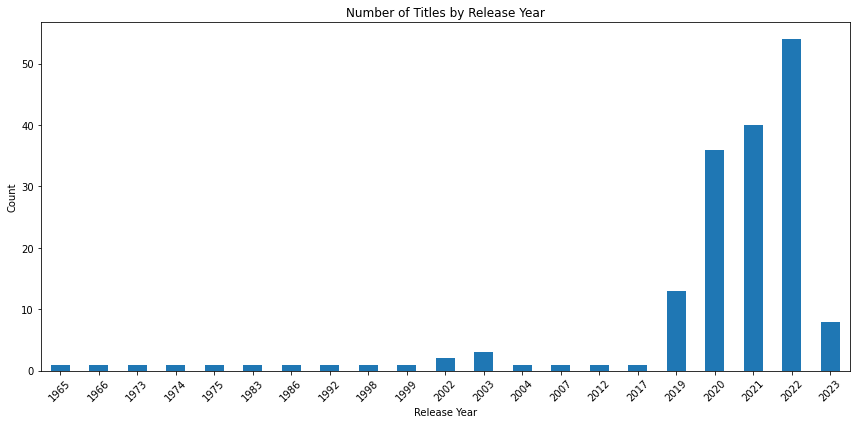

In [9]:
import numpy as np

# release_year 열의 데이터 전처리
df['release_year'] = df['release_year'].fillna('Unknown')  # 결측치를 'Unknown'으로 대체

# 각 연도별 등장 횟수 계산
year_counts = df['release_year'].value_counts().sort_index()

# 그래프로 시각화
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Number of Titles by Release Year')
# xtick_labels = [year if year % 10 == 0 else '' for year in year_counts.index]
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

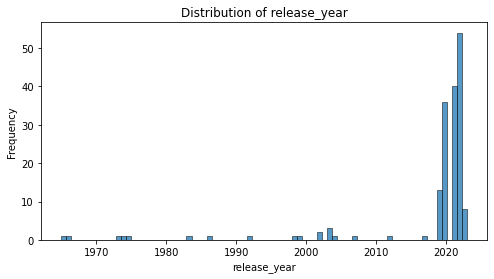

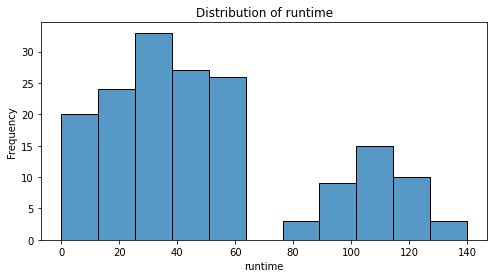

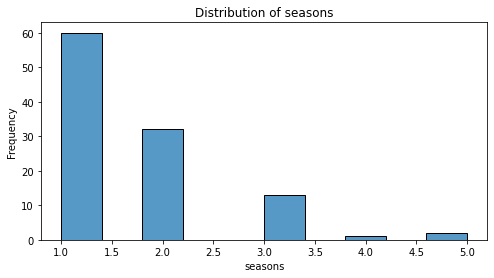

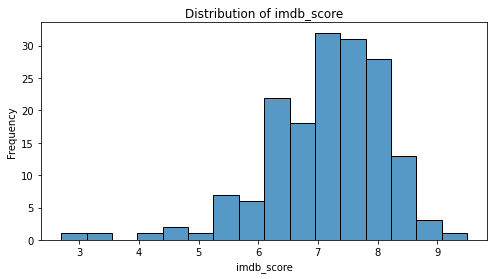

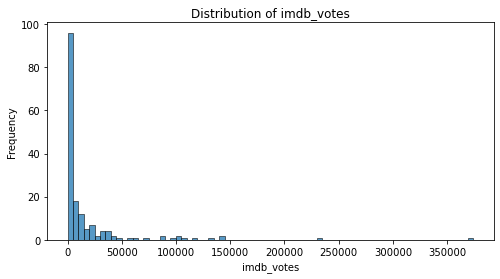

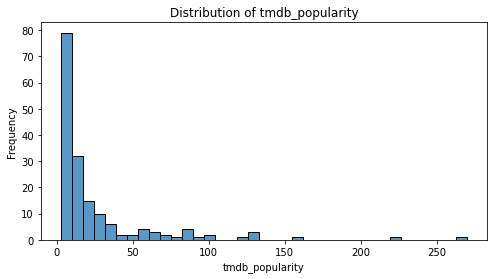

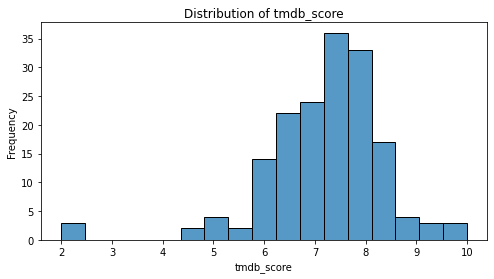

In [10]:
# 수치형 열의 분포 시각화
numeric_columns = df.select_dtypes(include='number').columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column].dropna())
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


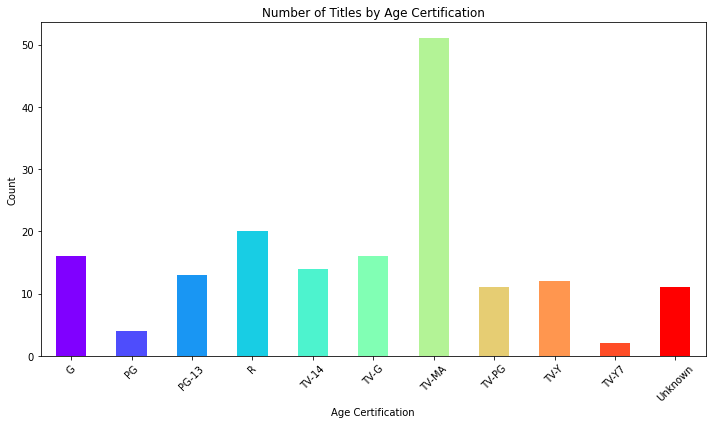

In [16]:
# age_certification 열의 데이터 전처리
df['age_certification'] = df['age_certification'].fillna('Unknown')  # 결측치를 'Unknown'으로 대체

# 각 연령 인증별 등장 횟수 계산
age_counts = df['age_certification'].value_counts()

# 알파벳 순으로 정렬
age_counts = age_counts.sort_index()

# 그래프로 시각화
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(age_counts))))
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.title('Number of Titles by Age Certification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

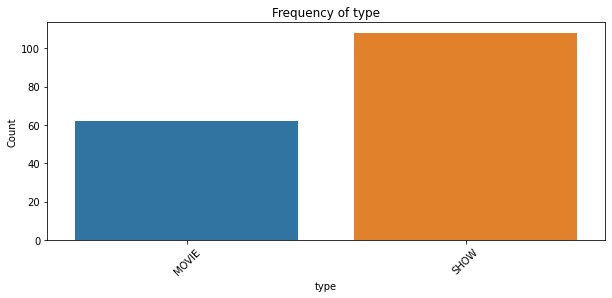

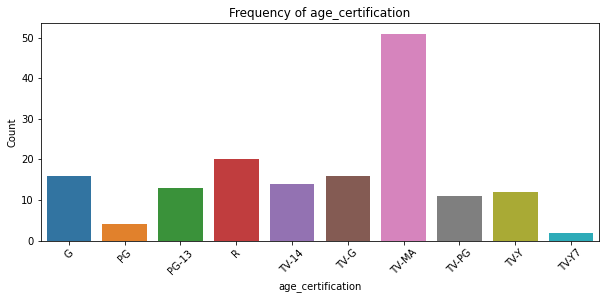

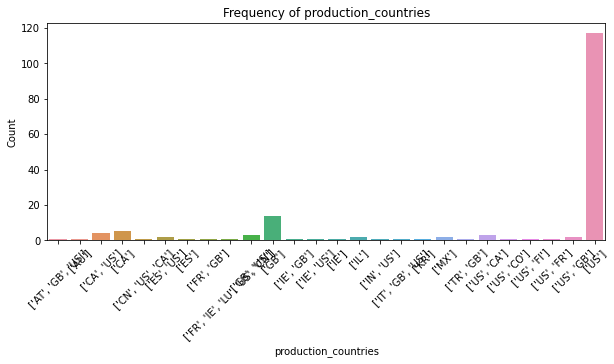

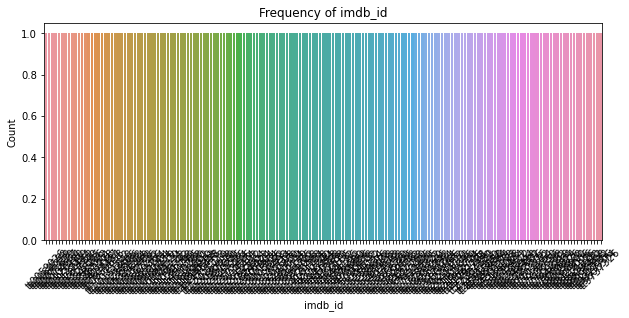

In [11]:
# 그래프 테마 설정
# sns.set_theme()

# 범주형 열의 빈도수 시각화 (id, title, description 열 제외)
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns = [column for column in categorical_columns if column not in ['id', 'title', 'description', 'genres']]

for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=column, order=sorted(df[column].value_counts().index))
    plt.title(f"Frequency of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

### 장르 분석

In [12]:
# genre 열의 데이터를 쉼표를 기준으로 분리하여 합집합 만들기
genres = set()
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        genres.update(genre_list.split(','))


In [13]:
# 각 리스트의 원소를 포함하는 빈도수 계산
genre_counts = {genre: 0 for genre in genres}
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        for genre in genre_list.split(','):
            genre = genre.strip()
            if genre in genre_counts:
                genre_counts[genre] += 1
            else:
                genre_counts[genre] = 1

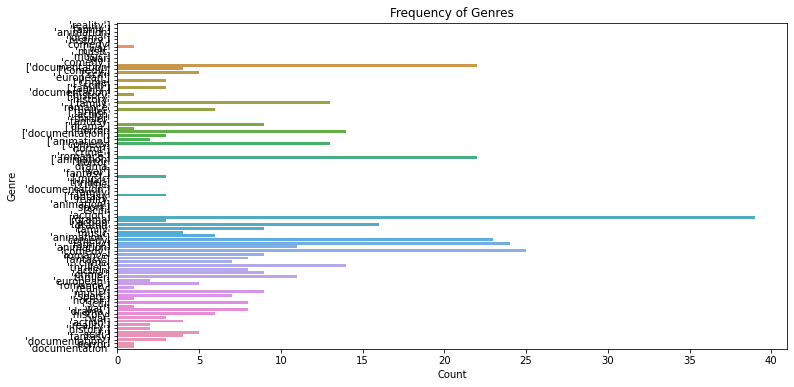

In [14]:
# 빈도수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.values()), y=list(genre_counts.keys()))
plt.title("Frequency of Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

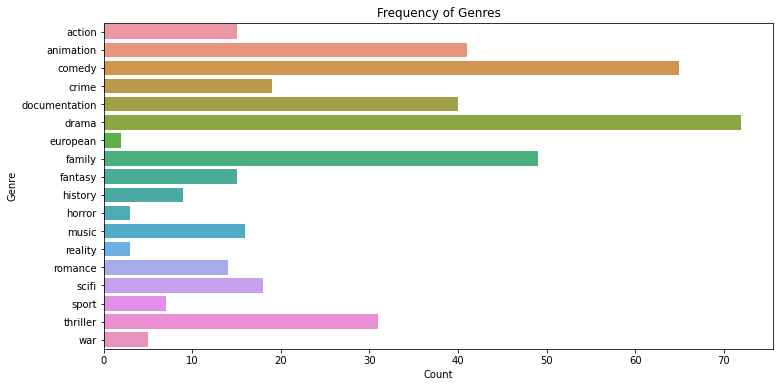

In [15]:
import re

# genre 열의 데이터를 쉼표를 기준으로 분리하여 알파벳만 남긴 문자열로 변환하여 합집합 만들기
genres = set()
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        genres.update(re.findall(r'[a-zA-Z]+', genre_list))


# 보기 쉽게 알파벳 순 정렬
genres = sorted(list(genres))

        
# 각 문자열의 빈도수 계산
genre_counts = {genre: 0 for genre in genres}
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        for genre in re.findall(r'[a-zA-Z]+', genre_list):
            genre = genre.lower()
            genre_counts[genre] += 1

# 빈도수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.values()), y=list(genre_counts.keys()))
plt.title("Frequency of Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

### 생산국 분석

/var/folders/yf/gjfgf6ln6174lclcvt3pmlc00000gn/T/ipykernel_15460/2456696531.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['production_countries'] = df['production_countries'].str.replace("[", "")
/var/folders/yf/gjfgf6ln6174lclcvt3pmlc00000gn/T/ipykernel_15460/2456696531.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['production_countries'] = df['production_countries'].str.replace("]", "")


<Figure size 864x432 with 0 Axes>

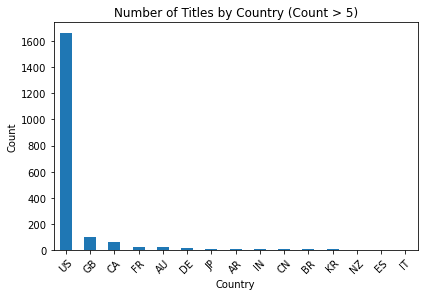

In [35]:
# production_country 열의 데이터 전처리
df = pd.read_csv("../Disney_dataset/titles.csv")


# 데이터 전처리
df['production_countries'] = df['production_countries'].fillna('Unknown')  # 결측치를 'Unknown'으로 대체
df['production_countries'] = df['production_countries'].str.strip()  # 공백 제거
df['production_countries'] = df['production_countries'].str.replace("[", "")
df['production_countries'] = df['production_countries'].str.replace("]", "")
df['production_countries'] = df['production_countries'].str.replace(",", "")
df['production_countries'] = df['production_countries'].str.replace("'", "")
df['production_countries'] = df['production_countries'].str.split(" ")

# print(df['production_countries'])

# 각 나라의 등장 횟수 계산
country_counts = {}
for countries in df['production_countries']:
#     print(countries)
    for country in countries:
#         print(country)
        if country in country_counts:
            country_counts[country] += 1
        else:
            country_counts[country] = 1

# 등장 횟수가 5 이상인 나라만 선택 및 빈 문자열 제거
filtered_country_counts = {country: count for country, count in country_counts.items() if count > 5 and len(country) > 0}


# 그래프로 시각화
country_df = pd.DataFrame.from_dict(filtered_country_counts, orient='index', columns=['Count'])
country_df = country_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
country_df.plot(kind='bar', legend=None)
plt.xlabel('Country')
plt.ylabel('Count')

# 나라 이름을 문자열로 변환하여 x축에 표시
plt.xticks(rotation=45)
plt.tight_layout()

plt.title('Number of Titles by Country (Count > 5)')
plt.show()